# <font color='red'>Classification (part 2)</font>

Task is to re-run the classification exercise as from part 1, but now multi-class, and using a NN.

*NOTE: there are no "**Practice**" tags in this notebook, just use this as a single flow of commands and try to understand what it does.*




> WARNING: check you are on a CPU runtime when you start this notebook.


## Set-up

In [16]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
#tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [17]:
import tensorflow as tf
#%tensorflow_version 1.x
print(tf.__version__)

2.4.1


## Import dataset

In [18]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NOTE: if you run this on colab, you will notice it will download the data from Amazon AWS (i.e. cloud), direct URL is: https://s3.amazonaws.com/img-datasets/mnist.npz

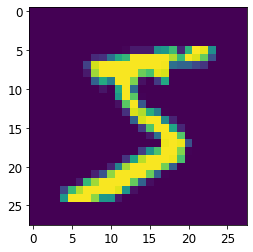

In [19]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [20]:
#check image shape
X_train[0].shape

(28, 28)

## Data preprocessing

In [21]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [22]:
from keras.utils import to_categorical
#one-hot encode target column
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [23]:
y_train[0]

5

In [24]:
y_train_OHE[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build the model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [26]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> <font color='red'> **ATTENTION**: _The execution of the next cell will trigger model training. On a CPU 1 epoch takes few minutes, same locally or on colab.. and - if you are running locally - your CPU will surely start heating up, the fan will turn on at 50-ish% of 1st epoch, python process at >100% CPU soon, etc.. Make sure you set "epochs" to a very low value. E.g. 1 is ok to start.. then read later!_</font>


In [27]:
%%time
#train the model
model.fit(X_train, y_train_OHE, validation_data=(X_test, y_test_OHE), epochs=1)   # check carefully the nb

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5033 - accuracy: 0.9220 - val_loss: 0.0874 - val_accuracy: 0.9738
CPU times: user 6.66 s, sys: 1.27 s, total: 7.93 s
Wall time: 6.93 s


## CPU vs GPU Exercise

[THIS MUST BE DONE ON COLAB]

Try to "change runtime type", select a GPU, reset all variables, clean all output and re-run the entire notebook so far. Focus on the cell above, where the training happens. Compare the time it takes to run 1 epoch on CPU vs GPU (vs TPU). If you do all correctly, conclusions should be self-explanatory!

Hint: `%%time` as cell magic to automatically compute how it takes to run a cell.

## Make predictions

E.g. predict first 4 images in the test set:

In [28]:
model.predict(X_test[:4])

array([[2.35129143e-08, 6.70223035e-12, 1.03976021e-07, 3.48299295e-06,
        6.79778733e-11, 1.17970811e-09, 9.96348230e-12, 9.99995947e-01,
        5.97975287e-08, 4.69683698e-07],
       [2.16053422e-06, 1.40790490e-09, 9.99948025e-01, 2.70847875e-11,
        1.82843241e-09, 1.04299194e-10, 4.98560039e-05, 1.88103331e-13,
        5.62497375e-11, 1.15244782e-13],
       [2.12416380e-05, 9.91925657e-01, 1.34323782e-04, 9.80237360e-07,
        7.28716422e-03, 2.95017289e-05, 2.19629565e-05, 1.21397148e-04,
        4.47849103e-04, 9.83650261e-06],
       [9.99993205e-01, 4.35965153e-11, 2.20277272e-07, 7.44720818e-09,
        1.96047711e-08, 2.12868567e-09, 2.70689338e-06, 2.69808238e-11,
        8.72595862e-08, 3.71255919e-06]], dtype=float32)

The model predicts 7, 2, 1, 0 for the first four images. Let’s compare this with the actual labels (the truth):

In [29]:
y_test_OHE[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The actual results show that the first four images are also 7, 2, 1, 0. The model predicted correctly!